# Основы компьютерного зрения

- [OpenCV Tutorials - V 3.4](https://docs.opencv.org/3.4/d9/df8/tutorial_root.html)
- [OpenCV Tutorials - V 4.x](https://docs.opencv.org/4.x/d9/df8/tutorial_root.html)
- [OpenCV Tutorial: From Basic to Advanced - Kaggle](https://www.kaggle.com/code/talhabu/opencv-tutorial-from-basic-to-advanced)
- [OpenCV Python Tutorial - geeksforgeeks](https://www.geeksforgeeks.org/opencv-python-tutorial/)

## Обработка изображений с помощью библиотеки OpenCV

### Подключение необходимых библиотек

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Чтение изображения из файла и преобразование в многомерный массив

(2397, 3475, 3)


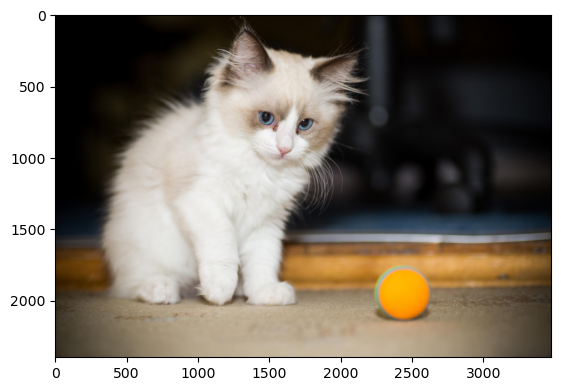

In [2]:
orig_img = imread('https://imageio.forbes.com/specials-images/imageserve/6082931ef598a85b055afe77/0x0.jpg')
#orig_img = imread('https://cdn.artphotolimited.com/images/5ca5bf82ce46dc3d348294d2/1000x1000/le-royaume-du-jaguar.jpg')

print(orig_img.shape)

plt.imshow(orig_img)

In [7]:
print(orig_img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[49 39 27]
  [49 39 27]
  [49 39 27]
  ...
  [52 44 33]
  [52 44 33]
  [52 44 33]]

 [[49 39 27]
  [49 39 27]
  [49 39 27]
  ...
  [53 45 34]
  [53 45 34]
  [53 45 34]]

 [[49 39 27]
  [49 39 27]
  [49 39 27]
  ...
  [53 45 34]
  [53 45 34]
  [53 45 34]]]


### Именение размера изображения

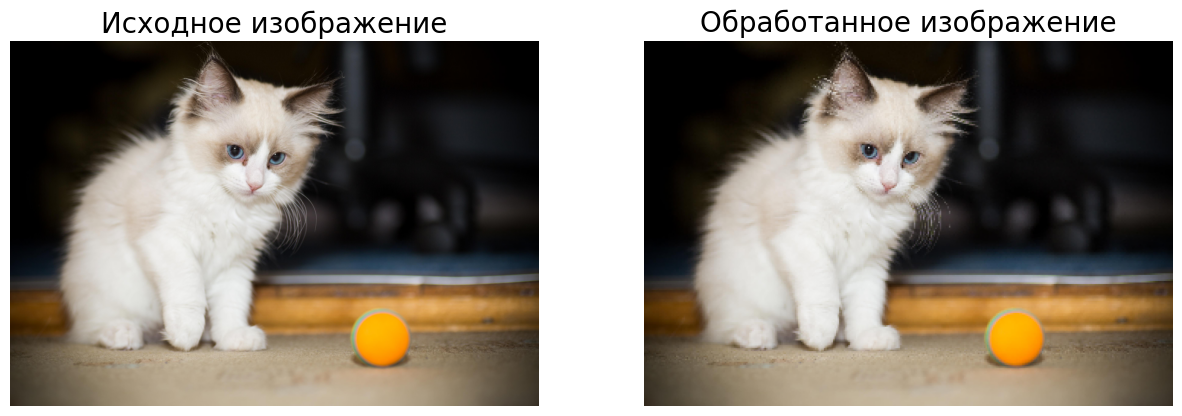

In [3]:
height = 240
width = 347
resized_img = cv2.resize(orig_img, (width, height)) # Основная команда - изменение размера

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(orig_img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)

plt.show()

### Кадрирование изображения

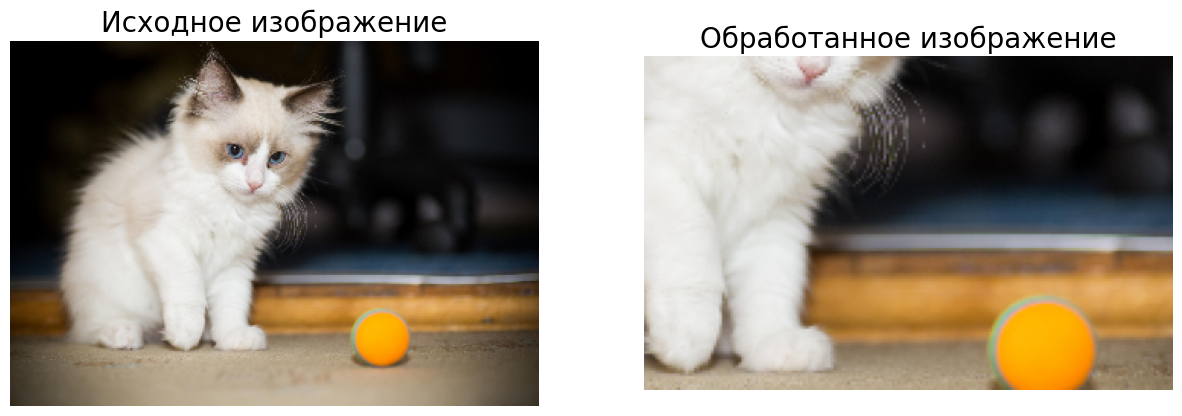

In [4]:
cropped_img = resized_img[90:210, 100:290] # Основная команда - обрезка, кадрирование

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(cropped_img )

plt.show()

### Рисование прямоугольников

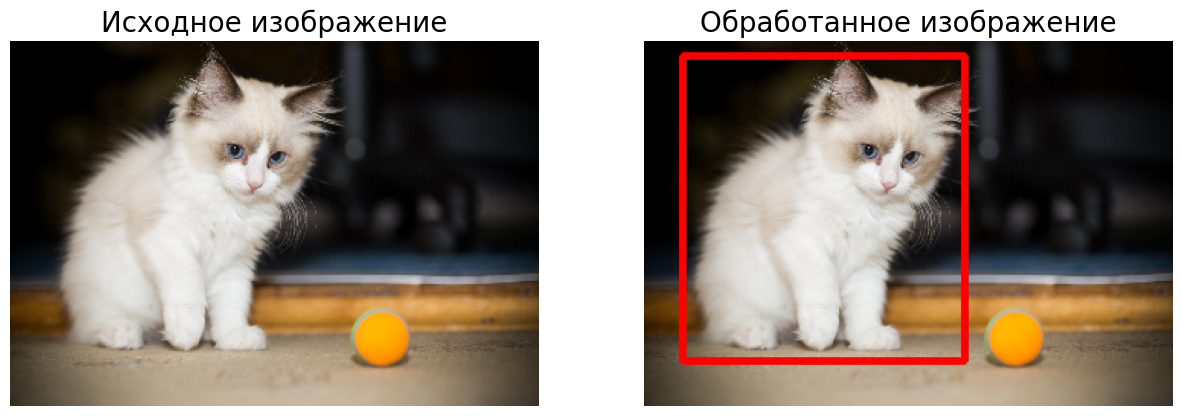

In [5]:
rect_img = resized_img.copy()
cv2.rectangle(rect_img, (25, 10), (210, 210), (255, 0, 0), 4) # Основная команда - рисование прямоугольника

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(rect_img)

plt.show()

### Изменение цветового пространства изображения

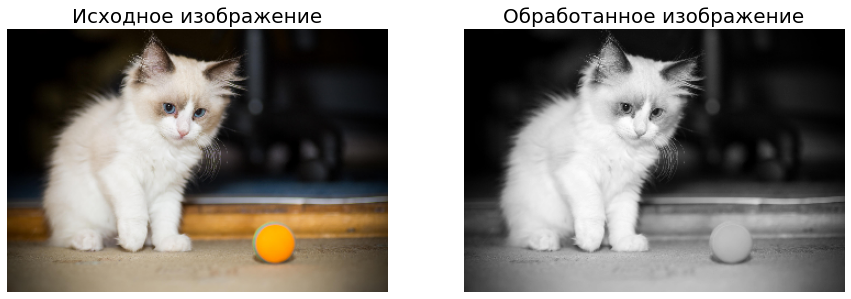

In [7]:
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY) # Основная команда - в оттенки серого

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(gray_img, cmap='gray')

plt.show()

**RGB-пространство** представляет собой куб с длиной ребра 256, в котором любой цвет задается координатами соответствующей точки на этом кубе. Широкое распространение такой модели формирования цвета объясняется тем, что на экране телефона или монитора компьютера изображение формируется за счет точек трех цветов — синего, зеленого и красного.

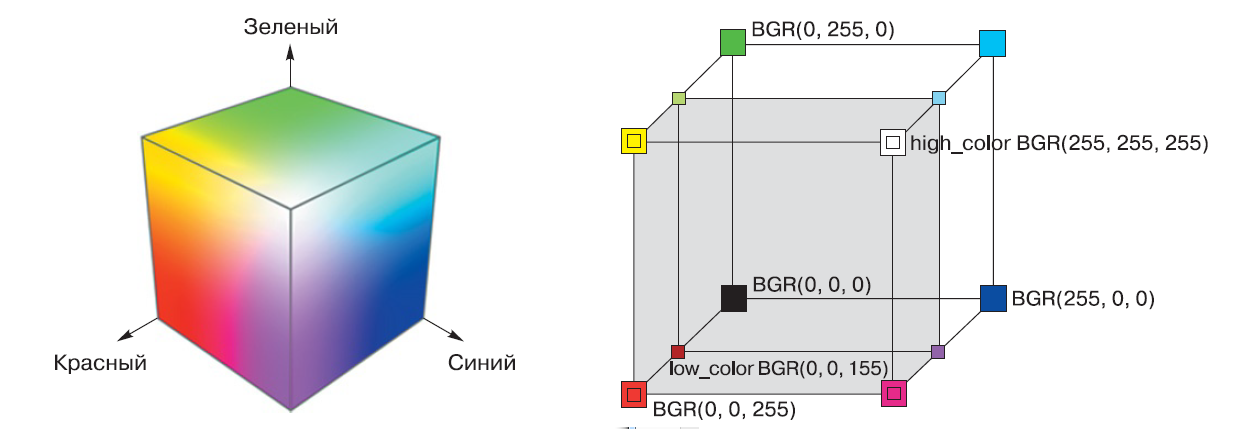

**HSV(B) (Hue, Saturation, Value (Brightness))** — модель цвета, координатами которой являются:

Hue — цветовой тон, который располагается в пределах от 0 до 360 градусов. В операционной системе Windows спектр цвета разделён на 240 оттенков;

Saturation — насыщенность, которая варьируется в пределах от 0 до 100. Чем ближе данный параметр к нулю, тем ближе цвет к серому и наоборот: чем выше цифра, тем цвет «чище»;

Value — яркость. Значение параметра варьируется от 0 до 100.

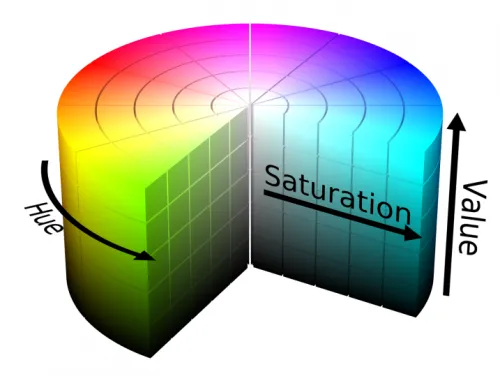

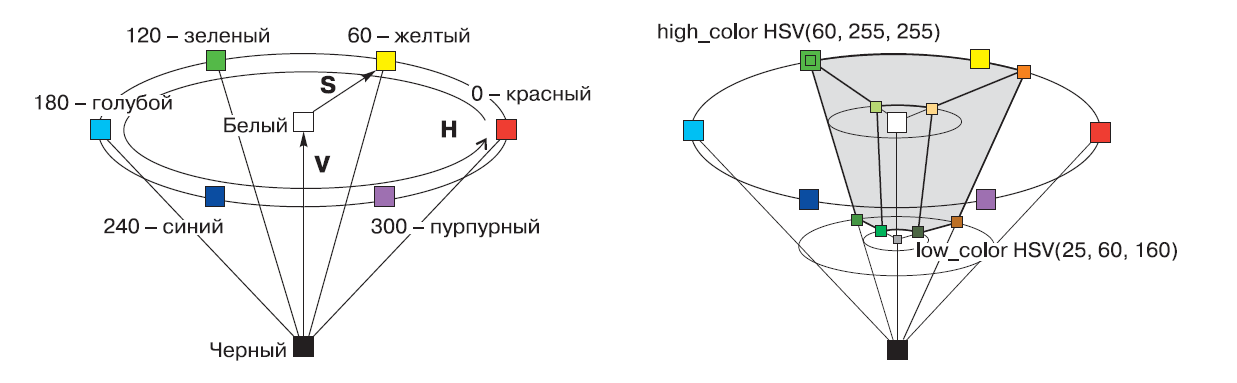

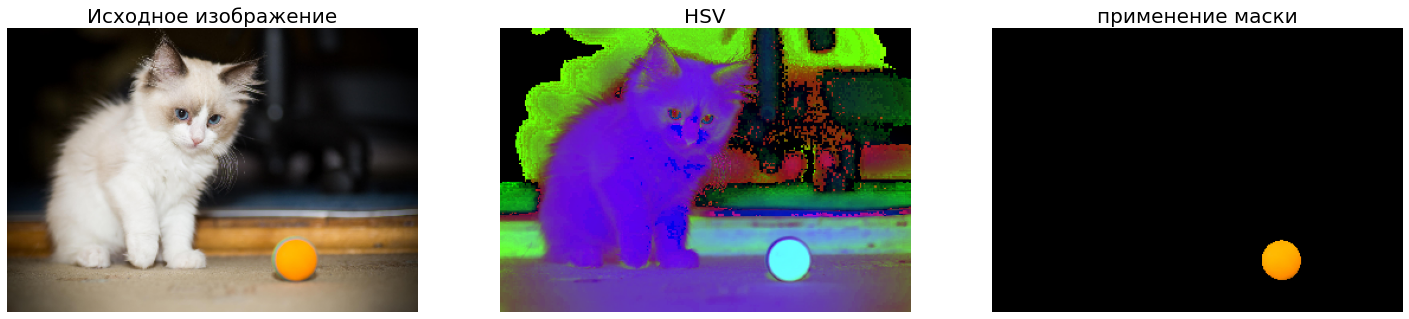

In [19]:
hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV) # Основная команда - преобразование цветовой модели из RGB to HSV


mask = cv2.inRange(hsv_img, (50, 240, 150), (255, 255, 255))
imask = mask>0
orange = np.zeros_like(resized_img, np.uint8)
orange[imask] = resized_img[imask]


font_size = 20
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(1, 3, 2).set_title('HSV', fontsize = font_size); plt.axis('off')
plt.imshow(hsv_img, cmap='gray')
plt.subplot(1, 3, 3).set_title('применение маски', fontsize = font_size); plt.axis('off')
plt.imshow(orange)

plt.show()

Этот код выполняет следующие действия:

1. `hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)`: Сначала цветное изображение `resized_img` преобразуется из цветовой модели RGB в цветовую модель HSV с использованием функции `cv2.cvtColor()`. Результат сохраняется в переменной `hsv_img`.

2. `mask = cv2.inRange(hsv_img, (50, 240, 150), (255, 255, 255))`: Затем создается маска, которая определяет области на изображении, где цвет соответствует заданным параметрам HSV. В данном случае, маска создается для всех пикселей, у которых значение оттенка (H) находится в диапазоне от 50 до 255, насыщенность (S) находится в диапазоне от 240 до 255, и значение яркости (V) находится в диапазоне от 150 до 255.

3. `imask = mask > 0`: Создается булев массив `imask`, который содержит `True` для всех пикселей, для которых маска `mask` имеет значение больше 0 (то есть, где цвет соответствует заданным параметрам).

4. `orange = np.zeros_like(resized_img, np.uint8)`: Создается черное изображение с таким же размером и типом данных, что и `resized_img`. Это изображение будет использоваться для отображения только тех пикселей, которые соответствуют условиям маски.

5. `orange[imask] = resized_img[imask]`: Значения пикселей на черном изображении `orange` копируются из исходного изображения `resized_img` только для тех пикселей, которые соответствуют условиям маски, то есть те пиксели, где `imask` равен `True`.

### Применение фильтра размытия

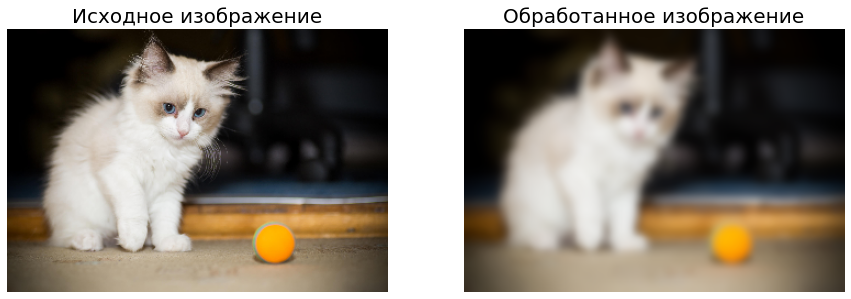

In [10]:
blur_img = cv2.GaussianBlur(resized_img, (21, 21), 0) # Основная команда - фильтр размытия

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(blur_img)

plt.show()

`blur_img = cv2.GaussianBlur(resized_img, (21, 21), 0)`: В этой строке выполняется операция размытия (блюра) над исходным изображением `resized_img`. В данном случае используется гауссово размытие (`cv2.GaussianBlur()`), которое создает размытие с использованием фильтра Гаусса. Параметры функции указывают размер ядра размытия `(21, 21)` (нечетное число, чтобы определить центральный пиксель) и сигму (стандартное отклонение) равное 0, что означает автоматический расчет стандартного отклонения на основе размера ядра. Результат размытия сохраняется в переменной `blur_img`.

### Детектор границ Кенни (Canny) 
Детектор границ Кенни (Canny) - это алгоритм для обнаружения границ на цифровых изображениях. Этот алгоритм был разработан Джоном Кенни в 1986 году и остается одним из самых популярных методов обнаружения границ в области обработки изображений. Он имеет несколько этапов обработки, которые позволяют выделить контуры и края объектов на изображении. Вот основные этапы работы алгоритма Canny:

1. **Сглаживание (Gaussian Smoothing)**: Сначала изображение подвергается гауссовому размытию (сглаживанию) для уменьшения шума. Это помогает создать более четкие градиенты на изображении.

2. **Вычисление градиентов (Gradient Calculation)**: Затем вычисляются градиенты по яркости пикселей на изображении. Это позволяет определить, где есть резкие изменения в интенсивности яркости, что может указывать на наличие границ.

3. **Подавление немаксимумов (Non-maximum Suppression)**: В этом этапе, для каждого пикселя проверяется, является ли он локальным максимумом в направлении градиента. Если это так, то пиксель сохраняется как "кандидат" на границу, иначе он подавляется.

4. **Пороговая обработка (Thresholding)**: После подавления немаксимумов пиксели делятся на две категории: "сильные" (считаются граничными пикселями) и "слабые" (пикселями, которые могли бы быть граничными). Для разделения используется два пороговых значения. Пиксели с градиентом выше верхнего порога считаются сильными, пиксели с градиентом ниже нижнего порога отбрасываются. Пиксели с градиентом между двумя порогами считаются слабыми.

5. **Связывание границ (Edge Tracking by Hysteresis)**: На этом этапе слабые пиксели пытаются связать с сильными пикселями, чтобы сформировать непрерывные границы. Если слабый пиксель связан с сильным пикселем, он также становится сильным. Этот процесс продолжается, пока все слабые пиксели не будут проверены.

Результатом работы алгоритма Canny являются бинарные изображения, на которых выделены контуры и грани объектов. Алгоритм Canny широко используется в обработке изображений, компьютерном зрении и компьютерном зрении для решения различных задач, таких как выделение объектов, распознавание лиц и др.

В зависимости от предобработки фотографий получается разный результат при одних и тех же настройках детектора

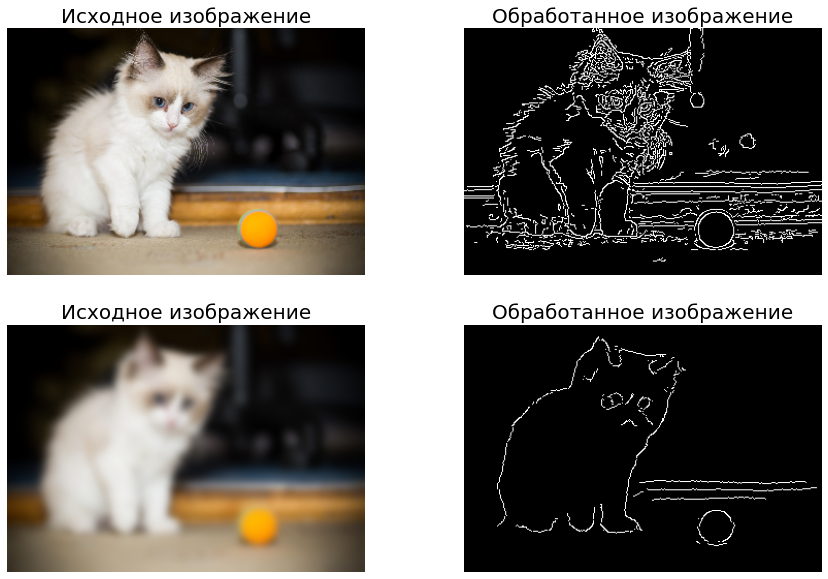

In [ ]:
edges1_img = cv2.Canny(resized_img, threshold1 = 50, threshold2 = 80)  # Основная команда
edges2_img = cv2.Canny(blur_img,    threshold1 = 50, threshold2 = 80)  # Основная команда

font_size = 20
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(resized_img)
plt.subplot(2, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(edges1_img, cmap = 'gray')
plt.subplot(2, 2, 3).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(blur_img)
plt.subplot(2, 2, 4).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(edges2_img, cmap = 'gray')

plt.show()

Этот код выполняет следующие действия:

1. `edges1_img = cv2.Canny(resized_img, threshold1=50, threshold2=80)`: В этой строке выполняется операция обнаружения границ на исходном изображении `resized_img` с использованием алгоритма Canny. Параметры `threshold1` и `threshold2` устанавливают пороги для обнаружения границ. Пиксели с градиентами между `threshold1` и `threshold2` считаются "слабыми" границами, а пиксели с градиентами выше `threshold2` считаются "сильными" границами. Результат обнаружения границ сохраняется в переменной `edges1_img`.

2. `edges2_img = cv2.Canny(blur_img, threshold1=50, threshold2=80)`: Здесь выполняется аналогичная операция обнаружения границ, но на изображении `blur_img`, которое было подвергнуто гауссовому размытию. Результат сохраняется в переменной `edges2_img`.

### Базовое преобразование Хафа для поиска прямых и окружностей

**Базовое преобразование Хафа** - это математический метод для обнаружения геометрических фигур, таких как прямые линии и окружности на цифровых изображениях. Преобразование Хафа работает путем преобразования пикселей изображения в параметрическое пространство, где каждая фигура (например, прямая или окружность) представлена уникальным набором параметров. Затем используется голосование (аккумуляция) для поиска наиболее вероятных параметров, представляющих обнаруженные фигуры.

Применительно к поиску прямых линий, базовое преобразование Хафа выражается следующим образом:

1. Каждая точка на изображении с ненулевым значением интенсивности (например, черная точка на белом фоне) рассматривается как потенциальная точка на прямой линии.

2. Для каждой точки изображения считаются все возможные прямые линии, которые проходят через эту точку. Каждая линия в параметрическом пространстве представлена двумя параметрами: угловым коэффициентом (наклоном) и расстоянием от начала координат до перпендикулярной линии, проходящей через данную точку.

3. Для каждой найденной прямой линии в параметрическом пространстве увеличивается значение в соответствующей ячейке (голосовании).

4. Процесс повторяется для каждой точки изображения, и результат - набор параметров (угол и расстояние) для обнаруженных прямых линий.

5. После завершения процесса преобразования Хафа, анализируются ячейки пространства параметров, и те ячейки, в которых значения превышают некоторый порог, считаются обнаруженными линиями.

Для поиска окружностей применяется модифицированное преобразование Хафа, называемое "преобразованием Хафа для окружностей". В этом случае параметры окружности включают координаты центра и радиус. Принцип работы аналогичен обнаружению прямых, но параметры центра и радиуса окружности рассматриваются вместо углового коэффициента и расстояния.

Преобразование Хафа - это мощный метод для обнаружения геометрических фигур на изображениях, но оно требует значительных вычислительных ресурсов и тщательной настройки параметров для получения хороших результатов.

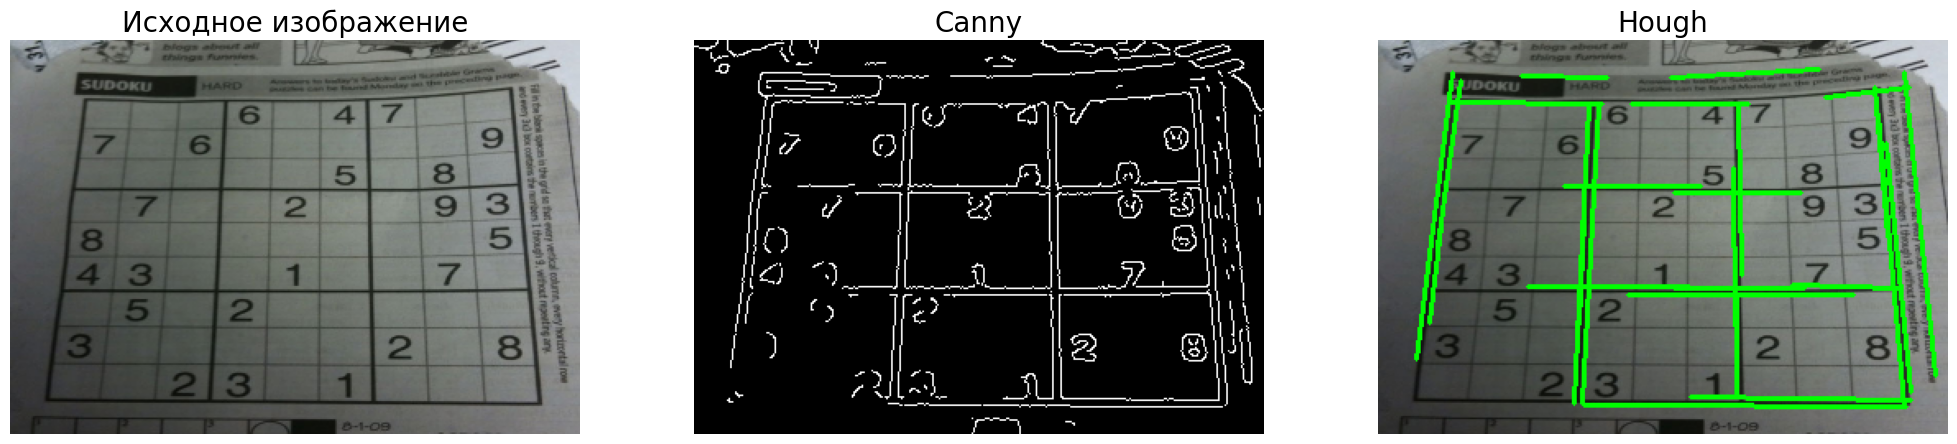

In [6]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('http://accord-framework.net/docs/images/imaging/hough-input.png')
    
height = 240
width = 347
resized_img = cv2.resize(img, (width, height))
img_copy = resized_img.copy()

blur_img = cv2.GaussianBlur(resized_img, (11, 11), 0)

edges_img = cv2.Canny(blur_img, 50, 60)

lines = cv2.HoughLinesP(edges_img, rho = 1, theta = 1 * np.pi / 180, threshold = 30, minLineLength = 50, maxLineGap = 10)

for line in lines:
    for x1, y1, x2, y2 in line:
        hough_lines_img = cv2.line(img_copy ,(x1,y1),(x2,y2),color = (0,255,0), thickness = 2)

font_size = 20
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(resized_img)
plt.subplot(1, 3, 2).set_title('Canny', fontsize = font_size); plt.axis('off')   
plt.imshow(edges_img, cmap = 'gray')
plt.subplot(1, 3, 3).set_title('Hough', fontsize = font_size); plt.axis('off')   
plt.imshow(hough_lines_img)
plt.show()

**Обнаружение линий на изображении с использованием преобразования Хафа:**

1. Изображение `img` изменяется в размере, чтобы уменьшить его разрешение до 347 пикселей в ширину и 240 пикселей в высоту с использованием `cv2.resize()`. Результат сохраняется в `resized_img`.

3. Создается копия `resized_img` в `img_copy`, которая будет использоваться для визуализации обнаруженных линий.

4. Выполняется гауссово размытие `blur_img` на `resized_img`. Это шаг помогает уменьшить шум на изображении и сгладить его.

5. Выполняется обнаружение границ с помощью алгоритма Кенни на размытом изображении `blur_img`. Результат сохраняется в `edges_img`.

6. Затем используется функция `cv2.HoughLinesP()` для обнаружения линий на `edges_img` с применением преобразования Хафа. Параметры функции настроены следующим образом:
   - `rho = 1`: Расстояние в пикселях между параметрами Хафа (расстояние от начала координат до обнаруженных линий).
   - `theta = 1 * np.pi / 180`: Угловой шаг в радианах для параметра Хафа (1 градус).
   - `threshold = 30`: Пороговое значение для обнаружения линий.
   - `minLineLength = 50`: Минимальная длина линии, которая будет принята во внимание.
   - `maxLineGap = 10`: Максимальный зазор между отдельными сегментами линий, который будет рассматриваться как одна линия.

7. Далее, код проходит через обнаруженные линии и рисует их на `img_copy` зеленым цветом с использованием `cv2.line()`.

8. Изображения `resized_img`, `edges_img` и `hough_lines_img` выводятся в одном окне: первый подграфик показывает исходное изображение, второй - изображение после обнаружения границ с помощью алгоритма Кенни, и третий - изображение с обнаруженными линиями после применения преобразования Хафа.

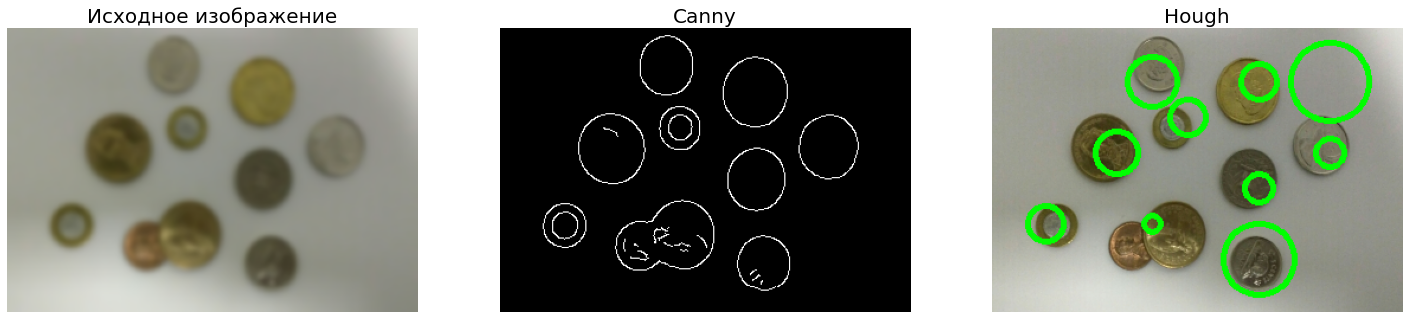

In [31]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('https://raw.githubusercontent.com/manasiye/Detect-Coins-using-Hough_Transform/master/HoughCircles.jpg')

height = 240
width = 347
resized_img = cv2.resize(img, (width, height))
img_copy = resized_img.copy()

blur_img = cv2.GaussianBlur(resized_img, (13,13), 0)

edges_img = cv2.Canny(blur_img, 50, 60)

circles = cv2.HoughCircles(edges_img, cv2.HOUGH_GRADIENT, 30, 30)

for circle in circles:
    for (x, y, r) in circle:
        hough_img = cv2.circle(img_copy, (int(x), int(y)), int(r), (0, 255, 0), 4)

font_size = 20
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(blur_img)
plt.subplot(1, 3, 2).set_title('Canny', fontsize = font_size); plt.axis('off')   
plt.imshow(edges_img, cmap = 'gray')
plt.subplot(1, 3, 3).set_title('Hough', fontsize = font_size); plt.axis('off')   
plt.imshow(hough_img)
plt.show()

**Обнаружение окружностей на цифровом изображении с использованием преобразования Хафа для окружностей:** 

1. Изображение `img` изменяется в размере, чтобы уменьшить его разрешение до 347 пикселей в ширину и 240 пикселей в высоту с использованием `cv2.resize()`. Результат сохраняется в `resized_img`.

2. Создается копия `resized_img` в `img_copy`, которая будет использоваться для визуализации обнаруженных окружностей.

3. Выполняется гауссово размытие `blur_img` на `resized_img`. Это шаг помогает уменьшить шум на изображении и сгладить его.

4. Выполняется обнаружение границ с помощью алгоритма Кенни на размытом изображении `blur_img`. Результат сохраняется в `edges_img`.

5. Затем используется функция `cv2.HoughCircles()` для обнаружения окружностей на `edges_img` с применением преобразования Хафа для окружностей. Параметры функции настроены следующим образом:
   - `cv2.HOUGH_GRADIENT`: Это метод детектирования окружностей, основанный на градиентах.
   - `30`: Разрешение параметра `dp`, которое определяет точность обнаружения окружностей.
   - `30`: Минимальное расстояние между центрами обнаруженных окружностей.
   
6. Далее, код проходит через обнаруженные окружности и рисует их на `img_copy`. Каждая обнаруженная окружность рисуется зеленой линией.

7. Изображения `blur_img`, `edges_img` и `hough_img` выводятся в одном окне: первый подграфик показывает изображение после гауссового размытия, второй - изображение после обнаружения границ с помощью алгоритма Кенни, и третий - изображение с обнаруженными окружностями после применения преобразования Хафа для окружностей.

### Проективные преобразования

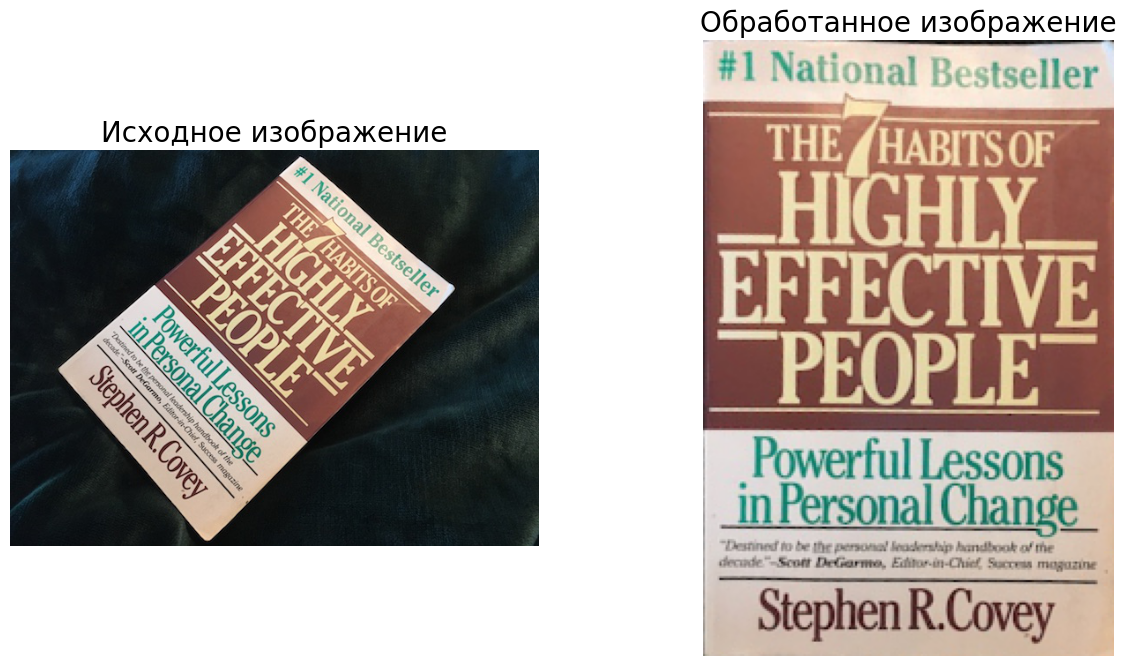

In [8]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('https://images.squarespace-cdn.com/content/v1/52d707a1e4b0cca896983732/1496409522326-F92L9BJ6UJFJ7FA608F6/image-asset.jpeg')

pts1 = np.float32([[330, 9],[505, 157],[224, 443],[54, 249]])
pts2 = np.float32([[0,0],[200,0],[200,300],[0,300]])

transformation_matrix = cv2.getPerspectiveTransform(pts1, pts2)
final_img = cv2.warpPerspective(img, M = transformation_matrix, dsize = (200, 300))
final_img = cv2.resize(final_img, (200, 300))

plt.figure(figsize=(15, 8))   
plt.subplot(1,2,1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(img)
plt.subplot(1,2,2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(final_img)
plt.show()

Код выполняет перспективное преобразование (или преобразование аффинной матрицей) изображения. Преобразование меняет вид изображения, перенося его с одной плоскости на другую. В данном случае код выполняет перспективное преобразование изображения с использованием библиотеки OpenCV:

1. Определяются два набора точек `pts1` и `pts2`, каждый из которых представляет координаты четырех углов в исходной и целевой плоскостях. `pts1` - это углы исходного изображения, а `pts2` - углы целевого изображения, на которое вы хотите преобразовать исходное.

2. Вычисляется матрица преобразования `transformation_matrix` с помощью `cv2.getPerspectiveTransform()`, используя заданные точки `pts1` и `pts2`. Эта матрица определяет, как исходное изображение будет преобразовано в целевое.

3. Выполняется преобразование исходного изображения с использованием полученной матрицы с помощью `cv2.warpPerspective()`. Размер целевого изображения устанавливается равным (200, 300), что задается параметром `dsize`.

4. Затем целевое изображение изменяется в размере до (200, 300) с использованием `cv2.resize()`, чтобы убедиться, что оно соответствует требуемым размерам.

5. Изображения (исходное и обработанное): первый подграфик показывает исходное изображение, а второй - изображение после перспективного преобразования.

Этот код позволяет изменять вид изображения, применяя преобразование перспективы, и может быть полезным, например, для коррекции искажений на фотографиях или для регистрации изображений с разными ракурсами.

### Нахождение контуров

**Метод Оцу (Otsu's method)** - это алгоритм бинаризации изображений, который используется для автоматического определения оптимального порога (threshold) для разделения изображения на два класса: передний план (объекты интереса) и фон. Этот метод был разработан Нобуюки Оцу и является одним из наиболее широко используемых методов бинаризации.

Идея метода Оцу заключается в поиске порога, который максимизирует дисперсию между двумя классами (передний план и фон), что делает изображение максимально разделимым. Более конкретно, метод Оцу выполняет следующие шаги:

1. Вычисляется гистограмма интенсивности пикселей на изображении.

2. Для каждого порога, начиная с минимального до максимального, вычисляются средние значения интенсивности пикселей для обоих классов (передний план и фон).

3. Вычисляется внутриклассовая дисперсия для обоих классов и суммируется.

4. Внутриклассовая дисперсия - это мера разброса интенсивности пикселей внутри класса. Чем больше дисперсия, тем лучше объекты класса различимы от фона.

5. Порог выбирается таким образом, чтобы максимизировать сумму внутриклассовых дисперсий обоих классов.

6. Найденный порог используется для бинаризации изображения, где все пиксели с интенсивностью, большей порога, считаются частью переднего плана, а остальные - фоном.

Преимущество метода Оцу заключается в его способности автоматически находить оптимальный порог для бинаризации без необходимости задания порога вручную. Это особенно полезно в случаях, когда известно, что интенсивности переднего плана и фона на изображении различаются.

Метод Оцу широко используется в обработке изображений для сегментации объектов и удаления фона, что делает его полезным в задачах распознавания и выделения объектов на фоне.

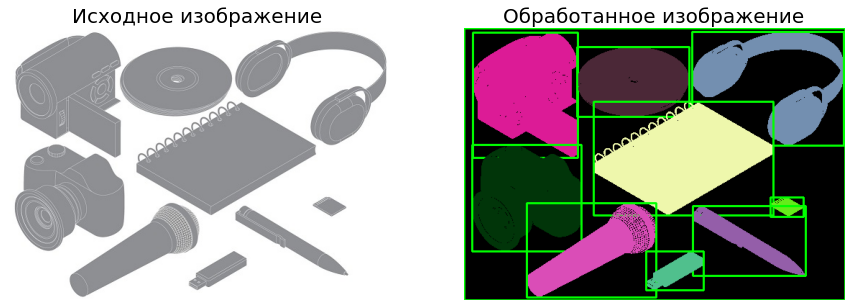

In [37]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np
img = imread('https://i.stack.imgur.com/4WFaG.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# binarize the image
ret, bw = cv2.threshold(gray, 128, 255, 
cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# find connected components
connectivity = 10
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(bw, connectivity, cv2.CV_32S)
sizes = stats[1:, -1]; nb_components = nb_components - 1
#min_size = 12050 #threshhold value for objects in scene
img2 = np.zeros((img.shape), np.uint8)
for i in range(0, nb_components+1):
    # use if sizes[i] >= min_size: # to identify your objects
    color = np.random.randint(255,size=3)
    # draw the bounding rectangele around each object
    cv2.rectangle(img2, (stats[i][0],stats[i][1]),(stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]), (0,255,0), 2)
    img2[output == i + 1] = color

font_size = 20
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(img)
plt.subplot(1,2,2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(img2)
plt.show()

Код выполняет следующие операции на изображении:

1. Изображение преобразуется в оттенки серого с помощью `cv2.cvtColor()`, используя `cv2.COLOR_BGR2GRAY`, чтобы упростить его обработку.

2. Изображение бинаризируется с использованием [метода Оцу (Otsu's method)](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9E%D1%86%D1%83) для определения порогового значения бинаризации. Пороговое значение определено как `cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU`, и белый фон становится черным, а черный объект - белым.

3. Затем на бинаризированном изображении выполняется поиск связанных компонентов с использованием `cv2.connectedComponentsWithStats()`. Этот метод находит и анализирует связанные компоненты на бинаризированном изображении и предоставляет информацию о каждой компоненте, такую как её размер, координаты и т. д.

4. Код создает новое изображение `img2`, которое будет использоваться для визуализации. Затем он проходит через каждую компоненту (объект) на изображении и выполняет следующие действия:
   - Генерирует случайный цвет.
   - Рисует ограничивающий прямоугольник вокруг объекта с использованием `cv2.rectangle()`.
   - Закрашивает область объекта этим случайным цветом на изображении `img2`.

5. На выходе получается изображение `img2`, на котором каждый объект выделен ограничивающим прямоугольником и окрашен в случайный цвет.

Обратите внимание, что код также содержит закомментированный код `# use if sizes[i] >= min_size: # to identify your objects`. Если вы хотите идентифицировать объекты только по размеру (например, игнорируя маленькие объекты), вы можете использовать эту линию кода, устанавливая `min_size` в соответствующее значение.

#### Нахождение наибольшего / наименьшего контура

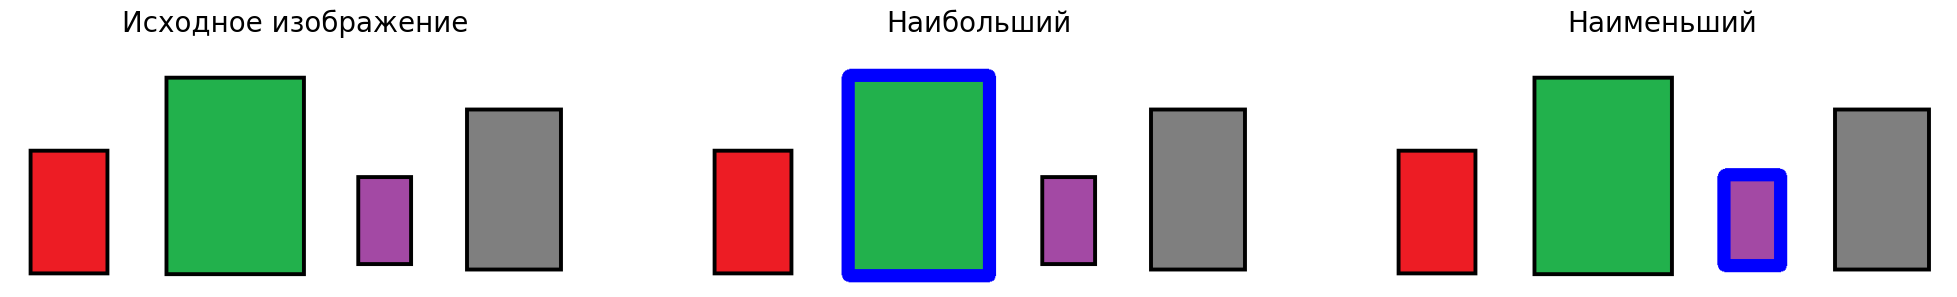

In [9]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread('http://www.learningaboutelectronics.com/images/Containers.png')
img_copy1 = img.copy()
img_copy2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray, 50, 200)
contours, hierarchy = cv2.findContours(img_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse= True)
largest_item = sorted_contours[0]
cv2.drawContours(img_copy1, largest_item, -1, (0,0,255), 15)
smallest_item = sorted_contours[-1]
cv2.drawContours(img_copy2, smallest_item, -1, (0,0,255), 15)

font_size = 20
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
plt.imshow(img)
plt.subplot(1, 3, 2).set_title('Наибольший', fontsize = font_size); plt.axis('off')   
plt.imshow(img_copy1, cmap = 'gray')
plt.subplot(1, 3, 3).set_title('Наименьший', fontsize = font_size); plt.axis('off')   
plt.imshow(img_copy2)
plt.show()

Этот код позволяет выделить контуры наибольшего и наименьшего объектов на изображении для дальнейшего анализа и визуализации:

1. Исходное изображение копируется дважды, создавая `img_copy1` и `img_copy2`, которые будут использоваться для визуализации результатов.

2. Изображение преобразуется в оттенки серого с помощью `cv2.cvtColor()`, используя `cv2.COLOR_BGR2GRAY`, чтобы упростить его обработку.

3. На оттенках серого изображения выполняется обнаружение границ с использованием алгоритма Кенни (Canny) с порогами 50 и 200. Результат сохраняется в `img_edges`.

4. Затем на изображении с границами `img_edges` выполняется поиск контуров с использованием `cv2.findContours()`. Функция `cv2.RETR_EXTERNAL` указывает на поиск только внешних контуров, а `cv2.CHAIN_APPROX_NONE` означает сохранение всех точек контуров без аппроксимации.

5. Найденные контуры сортируются по площади, и самый большой контур (наибольший объект) сохраняется в `largest_item`, а самый маленький контур (наименьший объект) сохраняется в `smallest_item`.

6. Затем используется `cv2.drawContours()`, чтобы нарисовать контуры на копиях изображения `img_copy1` и `img_copy2`. Контуры наибольшего и наименьшего объектов отмечаются красным цветом с толщиной линии 15.

7. На выходе получается изображение с изображенными контурами наибольшего и наименьшего объектов, а также исходное изображение.

### Нахождение объектов

Каскады Хаара (Haar cascades) - это метод машинного обучения для обнаружения объектов на изображениях или в видеопотоке. Они были предложены Виолой и Джонсом в 2001 году и являются популярным инструментом для решения задач обнаружения объектов, таких как лица, глаза, автомобили, и многое другое.

Основные характеристики каскадов Хаара:

1. **Каскадная структура:** Каскады Хаара представляют собой каскад из классификаторов. Каждый классификатор обучается на увеличивающемся наборе признаков, что позволяет им быть очень эффективными.

2. **Признаки Хаара:** Каскады Хаара используют набор простых признаков, называемых "признаками Хаара", которые являются прямоугольными областями на изображении с различными значениями интенсивности пикселей. Эти признаки являются быстрыми для вычисления и хорошо подходят для обнаружения текстурных различий.

3. **Обучение каскадов:** Каскады обучаются с использованием больших наборов изображений с положительными и отрицательными примерами. В процессе обучения они оптимизируются так, чтобы максимально уменьшить количество ложных срабатываний.

4. **Быстрая работа:** Каскады Хаара работают очень быстро и могут быть использованы для реального времени обнаружения объектов.

5. **Применения:** Каскады Хаара нашли применение в различных областях, включая распознавание лиц, обнаружение глаз, обнаружение автомобилей, анализ жестов и многое другое.

Каскады Хаара представляют собой мощный инструмент для решения задач обнаружения объектов в компьютерном зрении и могут быть использованы в различных приложениях, где необходимо выявлять и отслеживать определенные объекты на изображениях или в потоке видео.

In [ ]:
# import cv2
# from skimage.io import imread
# from matplotlib import pyplot as plt
# from skimage.io import imread

# img = imread('https://images.squarespace-cdn.com/content/v1/5be44996b98a783889d68ce7/1544065704472-U0MK6PRJVS8ERJBMZ7NL/Corporate+group+shot+Darwin.jpg')
# img_copy = img.copy()
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# faces = face_cascade.detectMultiScale(img_gray, scaleFactor = 1.3, minNeighbors = 5)
# for (fx, fy, fw, fh) in faces:
#     img = cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 0, 0), 2)
#     roi_gray = gray[fy:fy+fh, fx:fx+fw]
#     roi_color = img[fy:fy+fh, fx:fx+fw]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex, ey, ew, eh) in eyes:
#         cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# plt.figure(figsize=(25, 8))
# plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')   
# plt.imshow(img_copy)
# plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')   
# plt.imshow(img)
# plt.show()

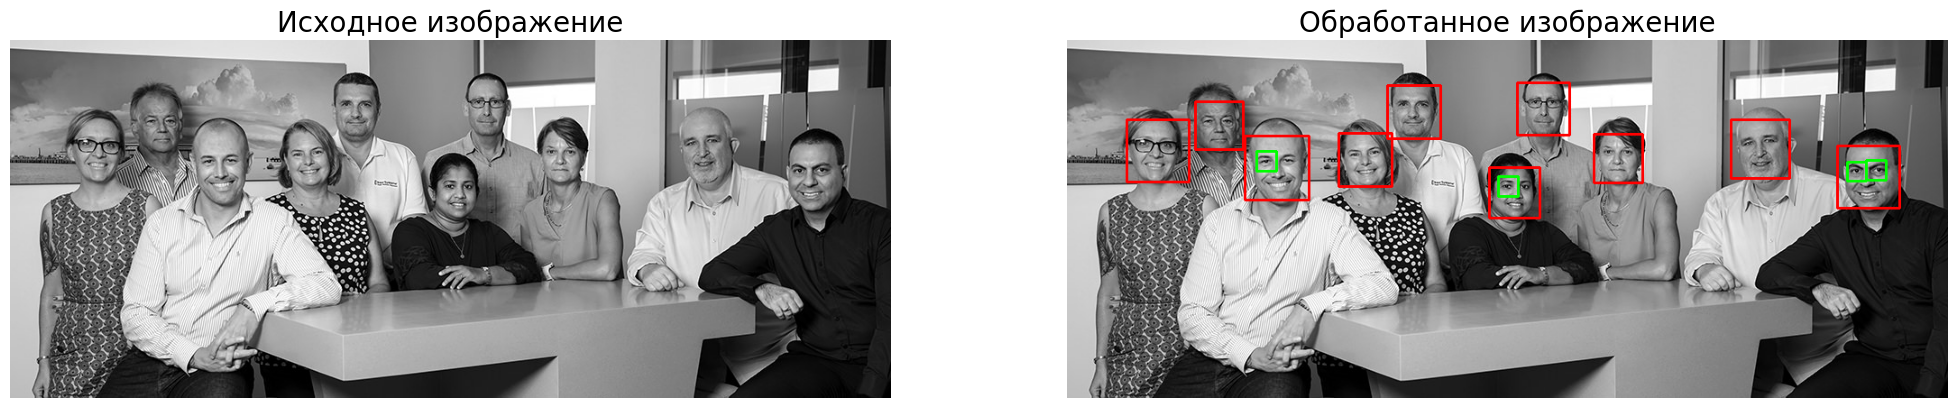

In [14]:
import cv2
from skimage.io import imread
from matplotlib import pyplot as plt

img = imread('https://images.squarespace-cdn.com/content/v1/5be44996b98a783889d68ce7/1544065704472-U0MK6PRJVS8ERJBMZ7NL/Corporate+group+shot+Darwin.jpg')
img_copy = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Замените путь на путь к файлам каскадов Хаара на вашем компьютере
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.3, minNeighbors=5)
for (fx, fy, fw, fh) in faces:
    img = cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 0, 0), 2)
    roi_gray = img_gray[fy:fy + fh, fx:fx + fw]
    roi_color = img[fy:fy + fh, fx:fx + fw]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

font_size = 20
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1).set_title('Исходное изображение', fontsize=font_size)
plt.axis('off')
plt.imshow(img_copy)
plt.subplot(1, 2, 2).set_title('Обработанное изображение', fontsize=font_size)
plt.axis('off')
plt.imshow(img)
plt.show()

Код выполняет обнаружение лиц и глаз на цифровом изображении, используя каскады Хаара (Haar cascades):

1. Исходное изображение преобразуется в оттенки серого с помощью `cv2.cvtColor()`, используя `cv2.COLOR_BGR2GRAY`, чтобы упростить его обработку.

2. Инициализируются два классификатора каскадов Хаара: один для обнаружения лиц (`face_cascade`) и другой для обнаружения глаз (`eye_cascade`). Классификаторы загружаются из библиотеки OpenCV с использованием предварительно обученных моделей.

3. Производится поиск лиц на оттенках серого изображения с использованием `face_cascade.detectMultiScale()`. Результаты обнаружения сохраняются в переменной `faces`. Параметры `scaleFactor` и `minNeighbors` настроены так, чтобы улучшить обнаружение лиц.

4. Для каждого обнаруженного лица выполняется следующее:
   - Рисуется прямоугольник вокруг лица с помощью `cv2.rectangle()`.
   - Зона интереса (Region of Interest, ROI) определяется внутри обнаруженного лица.
   - На этой ROI производится поиск глаз с использованием `eye_cascade.detectMultiScale()`.
   - Для каждого обнаруженного глаза рисуется прямоугольник вокруг глаза.

- [FACE DETECTION Using Haar cascade classifier in PYTHON using OpenCV](https://medium.com/geeky-bawa/face-detection-using-haar-cascade-classifier-in-python-using-opencv-97873fbf24ec)
- [data/haarcascades - github](https://github.com/opencv/opencv/tree/master/data/haarcascades) - предобученные модели на гитхабе
- [Face Detection using Haar Cascades — OpenCV-Python](https://medium.com/@mistrynirav123/face-detection-using-haar-cascades-opencv-python-f0319f3a8b51)
- [OpenCV Haar Cascades](https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/)

## ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png

1. Прочитайте изображение из файла и выведите его на экран:

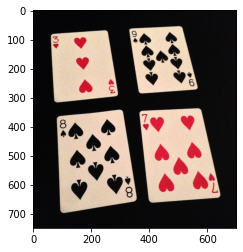

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

img = ... # !!! ВСТАВИТЬ КОД ВМЕСТО ТОЧЕК
...
plt.show()

2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):

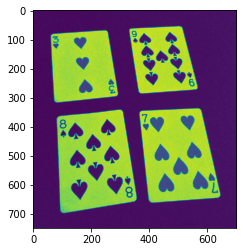

In [ ]:
gray = ... # !!! ВСТАВИТЬ КОД ВМЕСТО ТОЧЕК
blur = cv2.GaussianBlur(gray, (...,...), ...) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
plt.imshow(blur)a
plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

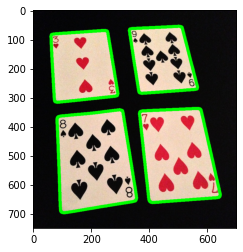

In [ ]:
numcards = 4

flag, thresh = cv2.threshold(blur, ..., ..., cv2.THRESH_BINARY) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, ...)[:numcards] # !!! ВСТАВИТЬ КОД ВМЕСТО ТОЧЕК

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)  
plt.imshow(contours_img)
plt.show()

4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением: 

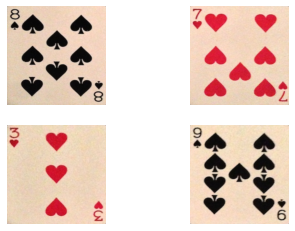

In [ ]:
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
    rect = cv2.minAreaRect(contours[2])
    r = cv2.boxPoints(rect)
    h = np.array([[0,0],[...,...],[...,...],[...,...]], np.float32) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
    plt.subplot(2,2,i+1); plt.axis('off')   
    plt.imshow(warp)

plt.show()

5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

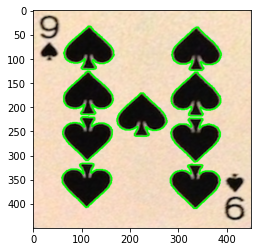

In [ ]:
img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
contours_img = warp.copy()

flag, thresh = cv2.threshold(img_gray, ..., ..., cv2.THRESH_BINARY) # !!! ПОДОБРАТЬ ЗНАЧЕНИЯ ПАРАМЕТРОВ ВМЕCТО ТОЧЕК
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour) ... > ... : # !!! ВСТАВИТЬ КОД ВМЕСТО ТОЧЕК
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()

6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

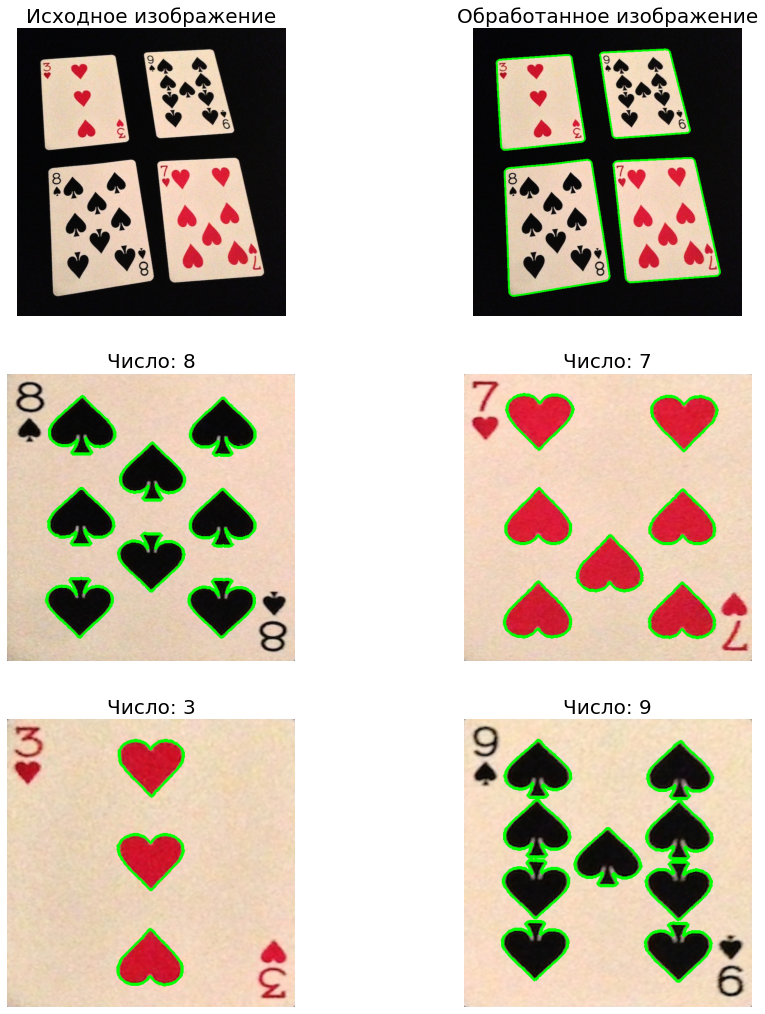

## ДЗ №2
Подумайте, что нужно изменить, чтобы код сработал для этого изображения:

https://arnab.org/blog/so-i-suck-24-automating-card-games-using-opencv-and-python/

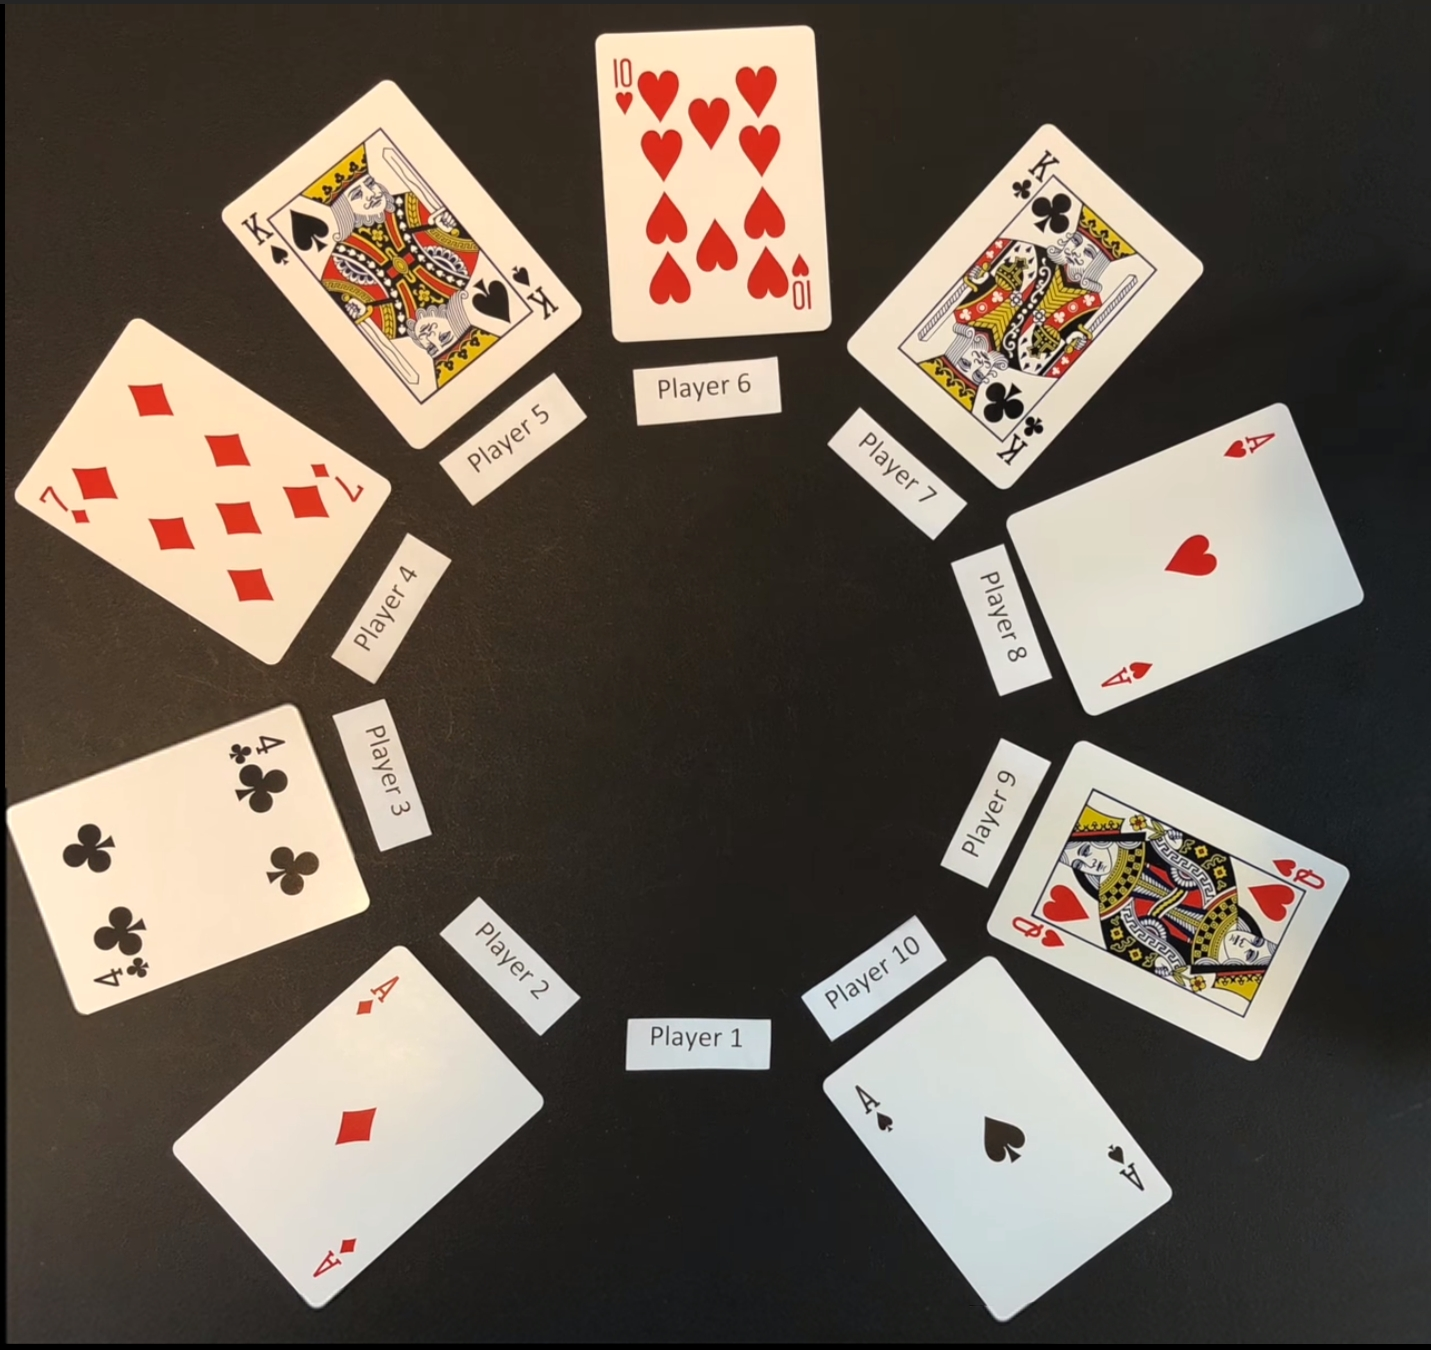